虽然深度学习在许多机器学习应用中都有巨大的潜力，但深度学习算法往往经过精确调整，只适用于特定的使用场景。这里只讨论一些相对简单的方法，即用于分类和回归的多层感知机 (multilayerperceptron，MLP)，它可以作为研究更复杂的深度学习方法的起点。MLP也被称为(普通)前馈神经网络，有时也简称为神经网络。

## 1. 神经网络模型

MLP 可以被视为广义的线性模型，执行多层处理后得到结论。

线性回归预测公式：           
                y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b


简单来说，y是输入特征x[0]到x[p] 的加权求和，权重为学到的系数w[0]到w[p]。可以将这个公式可视化，如图所示。

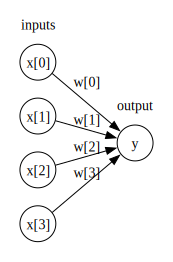

In [1]:
import mglearn
display(mglearn.plots.plot_logistic_regression_graph())
# logistic 回归可视化，其中输入特征和预测结果显示为结点，系数是结点之间的连线

图中，左边的每个结点代表一个输入特征，连线代表学到的系数，右边的结点代表输出是输入的加权求和。

在MLP中，多次重复这个计算加权求和的过程，首先计算代表中间过程的隐单元 (hiddenunit)，然后再计算这些隐单元的加权求和并得到最终结果:

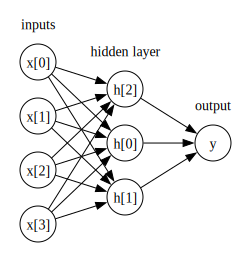

In [2]:
display(mglearn.plots.plot_single_hidden_layer_graph())

这个模型需要学习更多的系数 (也叫作权重):在每个输人与每个隐单元(隐单元组成了隐层)之间有一个系数，在每个隐单元与输出之间也有一个系数。

从数学的角度看，计算一系列加权求和与只计算一个加权求和是完全相同的，因此，为了让这个模型真正比线性模型更为强大，我们还需要一个技巧。在计算完每个隐单元的加权求和之后，对结果再应用一个非线性函数一一通常是校正非线性(rectifying nonlinearity,也叫校正线性单元或relu)或正切双曲线(tangens hyperbolicus，tanh)。然后将这个函数的结果用于加权求和，计算得到输出y。relu 截断小于0的值，而tanh 在输人值较小时接近-1，在输入值较大时接近 +1。有了这两种非线性函数，神经网络可以学习比线性模型复杂得多的函数。

Text(0, 0.5, 'relu(x), tanh(x)')

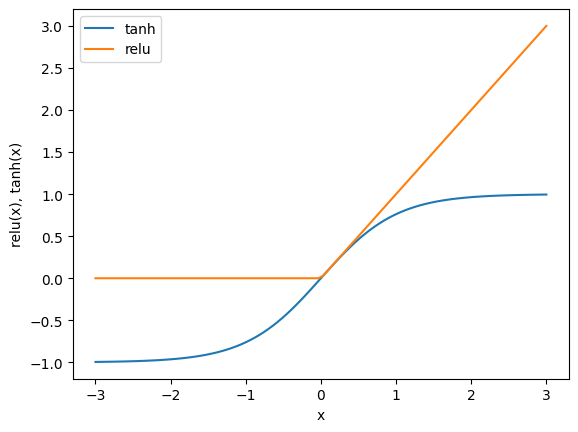

In [3]:
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

对于小型神经网络，计算回归问题的的完整公式如下(使用tanh非线性):

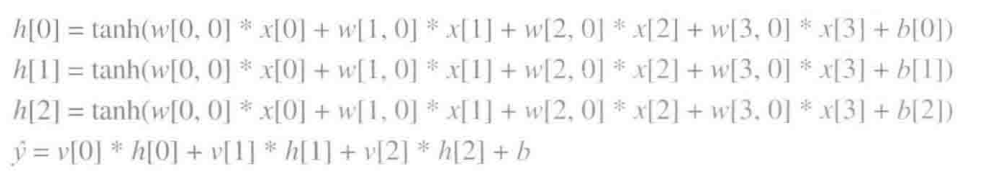

其中，w是输入，与隐层万之间的权重， 是隐层h与输出之间的权重。权重w和，要从数据中学习得到，x是输入特征，，是计算得到的输出，h是计算的中间结果。需要用户设置的一个重要参数是隐层中的结点个数。对干非常小或非常简单的数据集，这个值可以小到 10:对于非常复杂的数据，这个值可以大到 10 000。也可以添加多个隐层

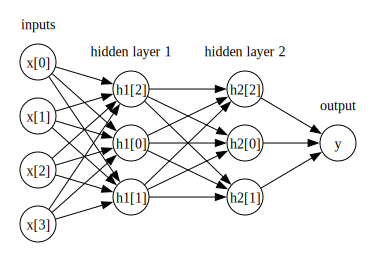

In [4]:
mglearn.plots.plot_two_hidden_layer_graph()

这些由许多计算层组成的大型神经网络，正是术语“深度学习”的灵感来源

## 2. 神经网络调参

将MLPClassifier 应用到 two_moons数据集上，以此研究MLP的工作原理。

Text(0, 0.5, 'Feature 1')

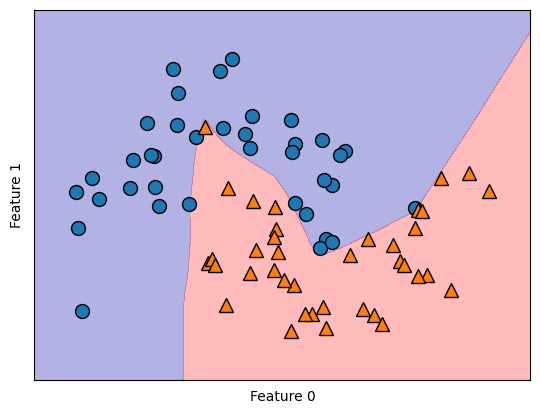

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver="lbfgs",random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

神经网络学到的决策边界完全是非线性的，但相对平滑。我们用到了solver='lbfgs'

默认情况下，MLP 使用100 个隐结点，这对于这个小型数据集来说已经相当多了。我们可以减少其数量(从而降低了模型复杂度)，但仍然得到很好的结果 

只有 10个隐单元时，决策边界看起来更加参差不齐。默认的非线性是 relu。如果使用单隐层，那么决策函数将由 10 个直线段组成。如果想得到更加平滑的决策边界，可以添加更多的隐单元 、添加第二个隐层或者使用tanh非线性。

Text(0, 0.5, 'Feature 1')

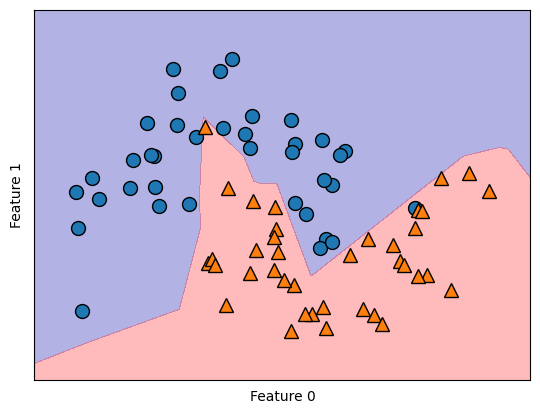

In [7]:
# 使用2个隐层，每个包含10个单元
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

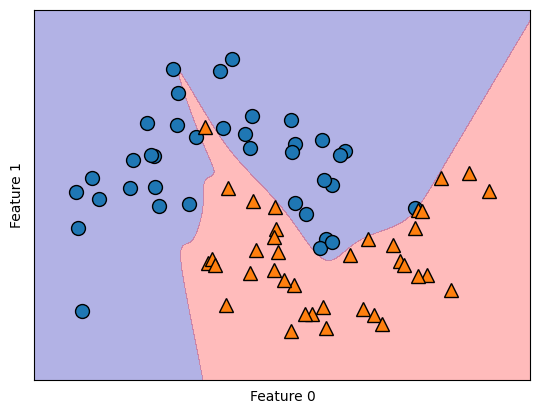

In [8]:
# 使用2个隐层，每个包含10个单元，这次使用tanh非线性
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)  # 绘制分割线
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)     # 绘制散点图
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

最后，我们还可以利用L2 惩罚使权重趋向于0，从而控制神经网络的复杂度，正如我们在岭回归和线性分类器中所做的那样。MLPClassifier 中调节L2惩罚的参数是 alpha (与线性回归模型中的相同)，它的默认值很小 (弱正则化)。用的是2个隐层的神经网络，每层包含 10个或 100个单元:

d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

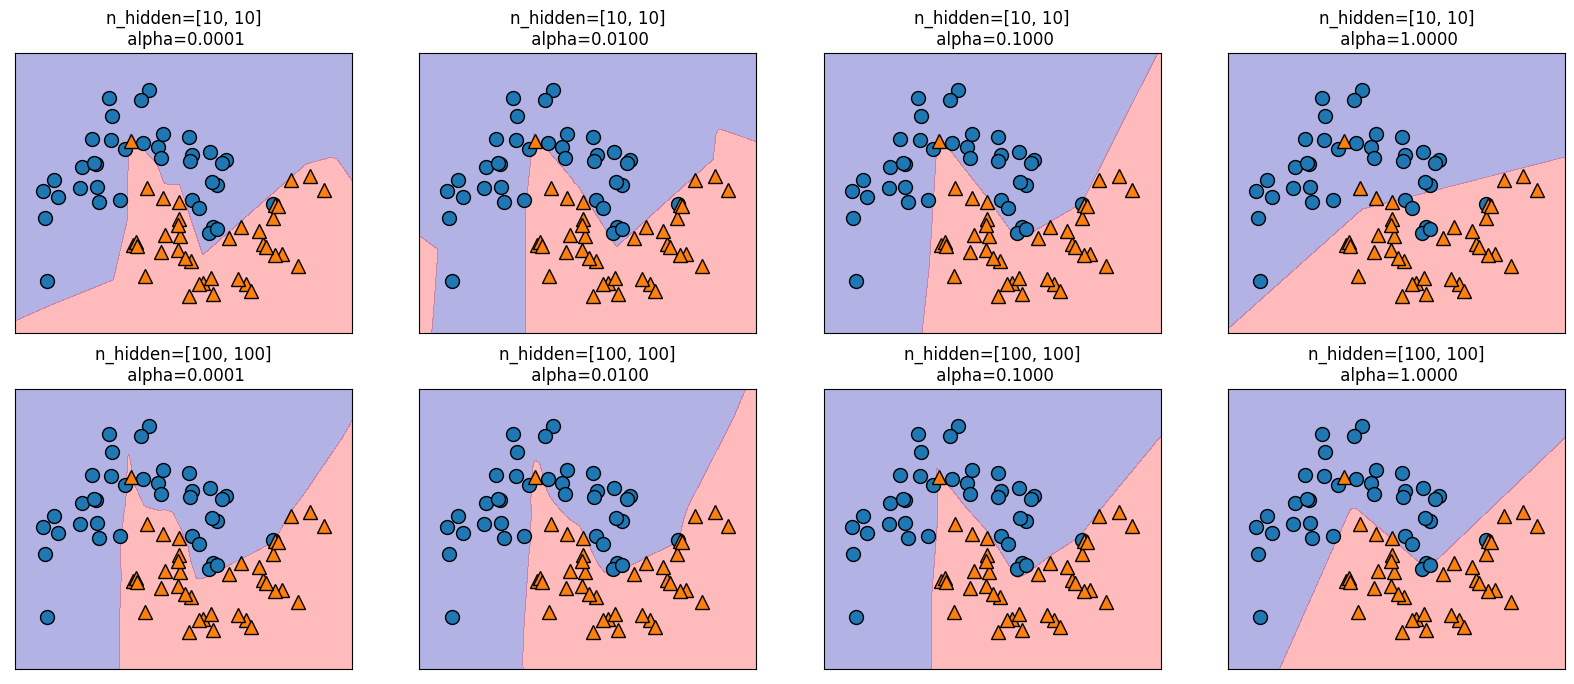

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_node in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_node, n_hidden_node],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(n_hidden_node,n_hidden_node,alpha))


现在你可能已经认识到了，控制神经网络复杂度的方法有很多种:隐层的个数、每个隐层中的单元个数与正则化 (alpha)。实际上还有更多    

神经网络的一个重要性质是，在开始学习之前其权重是随机设置的，这种随机初始化会影响学到的模型。也就是说，即使使用完全相同的参数，如果随机种子不同的话，我们也可能得到非常不一样的模型。如果网络很大，并且复杂度选择合理的话，那么这应该不会对精度有太大影响，但应该记住这一点 (特别是对于较小的网络)。

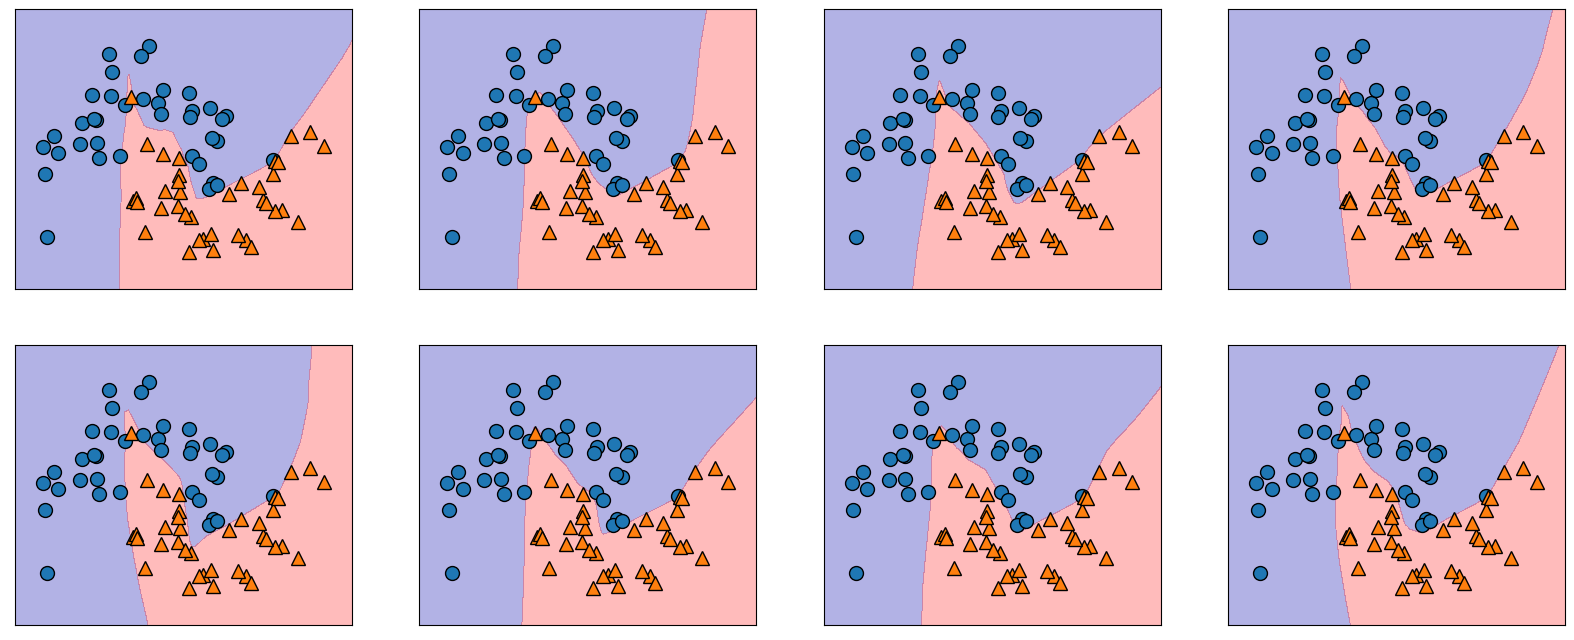

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
# ravel 用于将多维数组（如矩阵）转换成一维数组
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) # 分隔线
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,ax=ax)     # 散点图


# 相同参数但不同随机初始化的情况下学到的决策函数

In [18]:
# 为了在现实世界的数据上进一步理解神经网络，将MLPCLassifier 应用在乳腺癌数据集上。首先使用默认参数:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuary on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuary on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuary on training set: 0.939
Accuary on test set: 0.916


MLP的精度相当好，但没有其他模型好。与较早的SVC 例子相同，原因可能在于数据的缩放。神经网络也要求所有输入特征的变化范围相似，最理想的情况是均值为0、方差为1。我们必须对数据进行缩放以满足这些要求。

In [22]:
# 计算训练集中每个特征的平均值
mean_on_train = X_train.mean(axis=0)
# 计算训练集中每个特征标准差
std_on_train = X_train.std(axis=0)

# 减去平均值，再乘以标准差的倒数，如此计算后，mean=0, std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 对测试集做相同的变换
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuary on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuary on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuary on training set: 0.991
Accuary on test set: 0.965


d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


缩放之后的结果要好得多，而且也相当有竟争力。不过模型给出了一个警告，告诉我们已经达到最大迭代次数。这是用于学习模型的 adan 算法的一部分，告诉我们应该增加迭代次数:

In [25]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuary on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuary on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuary on training set: 1.000
Accuary on test set: 0.972


增加迭代次数仅提高了训练集性能，但没有提高泛化性能。不过模型的表现相当不错。由于训练性能和测试性能之间仍有一些差距，所以我们可以尝试降低模型复杂度来得到更好的泛化性能。这里我们选择增大 alpha 参数 (变化范围相当大，从0.0001到 1)，以此向权重添加更强的正则化:

In [26]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuary on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuary on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuary on training set: 0.988
Accuary on test set: 0.972


这得到了与我们目前最好的模型相同的性能。

虽然可以分析神经网络学到了什么，但这通常比分析线性模型或基于树的模型更为复杂要想观察模型学到了什么，一种方法是查看模型的权重。你可以在 scikit-learn示例库中查看这样的一个示例(http://scikit-learn.org/stable/auto examples/neural_networks/plot_mnist6lters.html)。对于乳腺癌数据集，这可能有点难以理解。下面这张图显示了连接输入和第一个隐层之间的权重。图中的行对应 30个输入特征，列对应 100个隐单元浅色代表较大的正值，而深色代表负值。

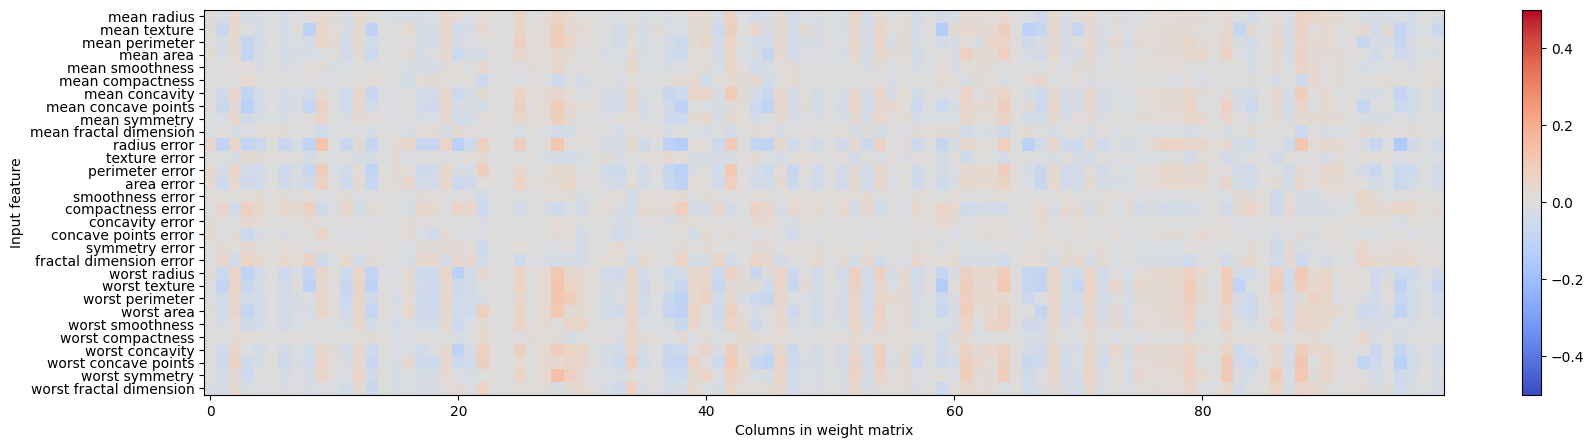

In [30]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(20,5))

# 使用不同的颜色映射（cmap）以及调整的参数
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='coolwarm', aspect='auto', vmin=-0.5, vmax=0.5)

# 设置 y 轴刻度和标签
plt.yticks(range(30), cancer.feature_names)

# 设置 x 轴标签和标题
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

# 添加颜色条
plt.colorbar()

# 显示图形
plt.show()


我们可以推断，如果某个特征对所有隐单元的权重都很小，那么这个特征对模型来说就不太重要”。可以看到，与其他特征相比，“mean smoothness”“mean compactness”以及smoothnesserror”和“fractal dimensionerr or”之间的特征的权重都相对较小。这可能说明这些特征不太重要，也可能是我们没有用神经网络可以使用的方式来表示这些特征。

我们还可以将连接隐层和输出层的权重可视化，但它们更加难以解释

## 3. 优点、缺点和参数

在机器学习的许多应用中，神经网络再次成为最先进的模型。它的主要优点之一是能够获取大量数据中包含的信息，并构建无比复杂的模型。给定足够的计算时间和数据，并且仔细调节参数，神经网络通常可以打败其他机器学习算法 (无论是分类任务还是回归任务)。

缺点。神经网络-一特别是功能强大的大型神经网络一一通常需要很长的训练时间。它还需要仔细地预处理数据。与SVM 类似神经网络在“均匀”数据上的性能最好，其中“均匀”是指所有特征都具有相似的含义如果数据包含不同种类的特征，那么基于树的模型可能表现得更好。神经网络调参本身也是一门艺术。调节神经网络模型和训练模型的方法有很多种

估计神经网络的复杂度。最重要的参数是层数和每层的隐单元个数。你应该首先设置 1个或2个隐层，然后可以逐步增加。每个隐层的结点个数通常与输人特征个数接近，但在几千个结点时很少会多于特征个数。

在考虑神经网络的模型复杂度时，一个有用的度量是学到的权重(或系数) 的个数。

如果你有一个包含 100个特征的二分类数据集，模型有 100个隐单元，那么输入层和第一个隐层之间就有 100*100= 10000个权重。在隐层和输出层之间还有 100*1= 100 个权重，总共约 10 100个权重。如果添加含有 100个隐单元的第二个隐层，那么在第一个隐层和第二个隐层之间又有 100*100=10 000个权重，总数变为约20 100个权重。如果你使用包含1000个隐单元的单隐层，那么在输入层和隐层之间需要学习 100* 1000=100 000 个权重隐层到输出层之间需要学习 1000*1= 1000 个权重，总共 101 000 个权重。如果再添加第个隐层，就会增加 1000*1000 =1000 000个权重，总数变为巨大的1101 000个权重这比含有2个隐层、每层 100个单元的模型要大 50倍

神经网络调参的常用方法是，首先创建一个大到足以过拟合的网络，确保这个网络可以对任务进行学习。知道训练数据可以被学习之后，要么缩小网络，要么增大 alpha 来增强正则化，这可以提高泛化性能。

在我们的实验中，主要关注模型的定义:层数、每层的结点个数、正则化和非线性。这些内容定义了我们想要学习的模型。还有一个问题是，如何学习模型或用来学习参数的算法，这一点由 solver 参数设定。solver 有两个好用的选项。默认选项是adam’，在大多数情况下效果都很好，但对数据的缩放相当敏感(因此，始终将数据缩放为均值为0、方差为1是很重要的)。另一个选项是  bfgs"，其鲁棒性相当好，但在大型模型或大型数据集上的时间会比较长。还有更高级的sgd’选项，许多深度学习研究人员都会用到。'sgd选项还有许多其他参数需要调节，以便获得最佳结果。

fit会重置模型     

scikit-learn模型的一个重要性质就是，调用fit 总会重置模型之前学到的所有内容。因此，如果你在一个数据集上构建模型，然后在另一个数据集上再次调用fit，那么模型会“忘记”从第一个数据集中学到的所有内容。你可以对一个模型多次调用ft，其结果与在“新”模型上调用ft 是完全相同的